<a href="https://colab.research.google.com/github/mahbubasharmin/Assignment/blob/main/Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re, json, nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
path='/content/drive/MyDrive/Colab Notebooks/sentiment_analysis.ipynb'
stopwords_list = path+'bangla_stopwords.txt'
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


In [3]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset Sentiment_Analysis - Sheet1 (1).csv")
data.head(120)

,Name,link,tag,comment
0,SareewaLi -শাড়িওয়ালি,https://www.facebook.com/sareewaliinfo,Positive,"অনেকবার শাড়ি নিয়েছি, এই পেজ থেকে। সবসময়ই ভা..."
1,SareewaLi -শাড়িওয়ালি,https://www.facebook.com/sareewaliinfo,Negative,এত বাজে রেস্পন্স তাদের যা বলার মত না। ক্লাইন্ট...
2,Iris Fashion,https://www.facebook.com/irisfashion.com.bd,Positive,বেস্ট একটা পেজ। খুব দ্রুত ডেলিভারি দেয় এবং পণ্...
3,SareewaLi -শাড়িওয়ালি,https://www.facebook.com/sareewaliinfo,Neutral,এই নিয়ে ৪বারে ১৪টা শাড়ি নিলাম সবগুলোই দামের ...
4,Batik:The Tradition,https://www.facebook.com/batikthetradition?mib...,Neutral,শাড়ি যেমনটাবিশ্বসি সমষ্টি টাইম।ডেলিভারি প্রসে...
...,...,...,...,...
101,Purnima Sarees,https://www.facebook.com/purnimasareebd,Negative,আপনারা মানুষকে প্রতারিত করার জন্য অনলাইন ব্যবস...
102,Purnima Sarees,https://www.facebook.com/purnimasareebd,Negative,কেউ বার্তার উত্তর দেয় না... যদিও শাড়িটি অনেক...
103,Purnima Sarees,https://www.facebook.com/purnimasareebd,Negative,খারাপ পরিষেবা। তাদের উত্তর দেওয়া হয় না
104,Purnima Sarees,https://www.facebook.com/purnimasareebd,Positive,আলহামদুলিল্লাহ। ২য় বারের মত ক্রয় করতে পেরেছি। ...


In [4]:
print("Total Reviews:",len(data),
      "\nTotal Positive Reviews:",len(data[data.tag =='Positive']),
      "\nTotal Negative Reviews:",len(data[data.tag =='Negative']),
      "\nTotal Neutral Reviews:",len(data[data.tag =='Neutral']))

Total Reviews: 106 
Total Positive Reviews: 44 
Total Negative Reviews: 33 
Total Neutral Reviews: 27


In [5]:
data.columns

Index(['Name', 'link', 'tag', 'comment'], dtype='object')

In [6]:
sample_data = [1,2,3,4,5,6,7,8,9,10,11,12,13,15,17,18,21,22,24,25,28,30,32,34,35,38,42,44,45,48]
for i in sample_data:
      if i < len(data):
        print(data.comment[i], '\n', 'Sentiment:-- ', data.tag[i], '\n')

এত বাজে রেস্পন্স তাদের যা বলার মত না। ক্লাইন্টকে তারা মানুষ ই মনে করে না। 
 Sentiment:--  Negative 

বেস্ট একটা পেজ। খুব দ্রুত ডেলিভারি দেয় এবং পণ্যের কোয়ালিটিও খুব ভালো। 
 Sentiment:--  Positive 

এই নিয়ে ৪বারে ১৪টা শাড়ি নিলাম সবগুলোই দামের তুলনায় খুব সুন্দর আর দ্রুত পার্সেল ডেলিভারি দেয় ধন্যবাদ Sareewali 
 Sentiment:--  Neutral 

শাড়ি যেমনটাবিশ্বসি সমষ্টি টাইম।ডেলিভারি প্রসেস ও গুড।ধন্যবাদ এগিয়ে যান। 
 Sentiment:--  Neutral 

এদের মেসেজ দিলে কখনোই পাওয়া যায় না কল ধরে না হোয়াটসঅ্যাপে মেসেজ সিন করেন না 
 Sentiment:--  Neutral 

আলহামদুলিল্লাহ অনেক ভালো মানের শাড়ী, কাপড় ও অনেক সফট 
 Sentiment:--  Positive 

সব মানের এবং সব ধরনের জামাকাপড় এখানে পাওয়া যায় যা সবসময় সেরা 
 Sentiment:--  Positive 

sari quality khub e baje r sari check kre dei nah khub e baje quality 
 Sentiment:--  Negative  

নির্ভয়ে কেনাকাটা করুন আপনাদের সবার পছন্দের বিশ্বাসযোগ্য অনলাইন পেজ "Mishela's Fashion" 
 Sentiment:--  Positive 

এই পণ্য সত্যিই চমৎকার 
 Sentiment:--  Positive 

ধন্যবাদ JN ফ্যাশন, শাড়

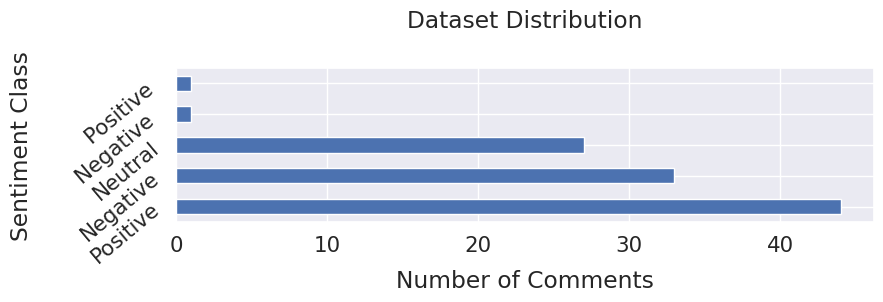

In [7]:
sns.set(font_scale=1.4)
data['tag'].value_counts().plot(kind='barh', figsize=(9, 2))
plt.xlabel("Number of Comments", labelpad=10)
plt.ylabel("Sentiment Class", labelpad=28)
plt.yticks(rotation =40)
plt.title("Dataset Distribution", y=1.21);

Data Cleaning

In [8]:
def process_comments(Comment):
    Comment = re.sub('[^\u0980-\u09FF]',' ',str(Comment)) #removing unnecessary punctuation
    return Comment

In [9]:
print(data.columns)
print(data.head())
data['cleaned'] = data['comment'].apply(process_comments)
print(len(data))
data['cleaned'] = data['comment'].apply(process_comments)

sample_data = range(min(10, len(data)))
for i in sample_data:
    print('Original:\n', data['comment'].iloc[i], '\nCleaned:\n',
          data['cleaned'].iloc[i], '\n', 'Sentiment:-- ', data['tag'].iloc[i], '\n')

Index(['Name', 'link', 'tag', 'comment'], dtype='object')
                   Name                                               link  \
0  SareewaLi -শাড়িওয়ালি             https://www.facebook.com/sareewaliinfo   
1  SareewaLi -শাড়িওয়ালি             https://www.facebook.com/sareewaliinfo   
2          Iris Fashion        https://www.facebook.com/irisfashion.com.bd   
3  SareewaLi -শাড়িওয়ালি             https://www.facebook.com/sareewaliinfo   
4   Batik:The Tradition  https://www.facebook.com/batikthetradition?mib...   

        tag                                            comment  
0  Positive  অনেকবার শাড়ি নিয়েছি, এই পেজ থেকে। সবসময়ই ভা...  
1  Negative  এত বাজে রেস্পন্স তাদের যা বলার মত না। ক্লাইন্ট...  
2  Positive  বেস্ট একটা পেজ। খুব দ্রুত ডেলিভারি দেয় এবং পণ্...  
3   Neutral  এই নিয়ে ৪বারে ১৪টা শাড়ি নিলাম সবগুলোই দামের ...  
4   Neutral  শাড়ি যেমনটাবিশ্বসি সমষ্টি টাইম।ডেলিভারি প্রসে...  
106
Original:
 অনেকবার শাড়ি নিয়েছি, এই পেজ থেকে। সবসময়ই ভালোই পেয়েছি।ধন্যবাদ আপ

In [10]:

data['length'] = data['cleaned'].apply(lambda x: len(x.split()))

dataset = data.loc[data['length'] > 1].reset_index(drop=True)

print("After Cleaning:",
      "\nRemoved {} Small Reviews".format(len(data) - len(dataset)),
      "\nTotal Reviews:", len(dataset))

After Cleaning: 
Removed 1 Small Reviews 
Total Reviews: 105


In [11]:
def data_summary(dataset):

    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.tag.value_counts().to_dict().items()]
    for label in class_label:
        word_list = [word.strip().lower() for t in list(dataset[dataset.tag==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
                ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.tag==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.tag==label].cleaned))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)


Class Name :  Positive
Number of Documents:44
Number of Words:449
Number of Unique Words:209
Most Frequent Words:

এবং	24
সুন্দর	14
মান	11
আমি	11
ধন্যবাদ	10
ভাল	9
অনেক	8
ভালো	8
ড্রেস	8
এই	7

Class Name :  Negative
Number of Documents:33
Number of Words:322
Number of Unique Words:150
Most Frequent Words:

নয়	16
মান	16
না	14
পোশাকের	13
ভালো	12
খারাপ	11
বেশি	7
ছবির	6
রঙ	6
কিন্তু	5

Class Name :  Neutral
Number of Documents:27
Number of Words:249
Number of Unique Words:116
Most Frequent Words:

ভালো	14
পোষাক	9
কাপড়	9
এবং	8
না	6
কখনও	6
পাওয়া	5
যায়	5
সমানভাবে	5
হয়	5

Class Name :  Positive 
Number of Documents:1
Number of Words:4
Number of Unique Words:4
Most Frequent Words:

খাবারের	1
মান	1
অনেক	1
ভালো	1
Total Number of Unique Words:363


/tmp/ipython-input-3119986481.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.xaxis.set_ticklabels(class_names, rotation=10);


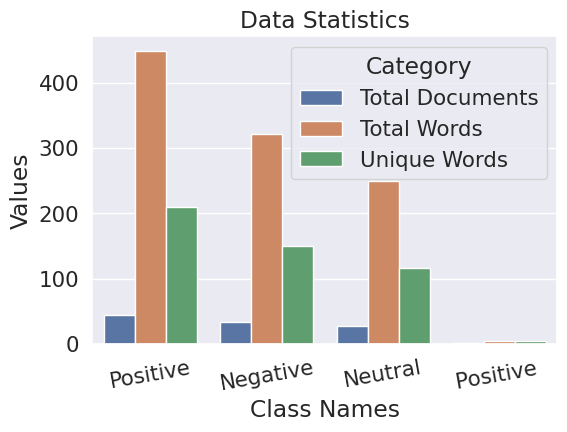

In [12]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(6,4))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names')
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=10);

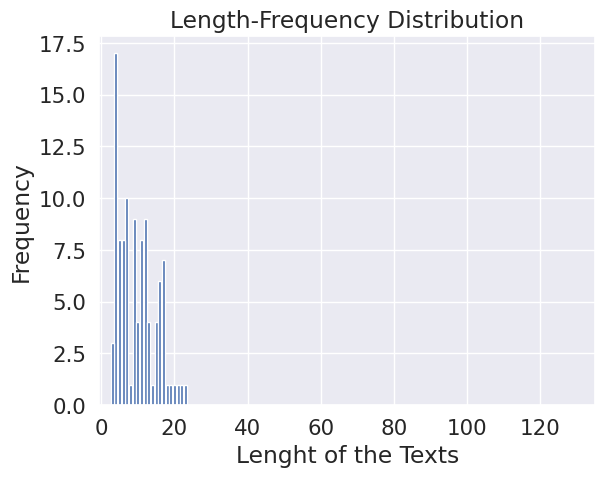

Maximum Length of a review: 23
Minimum Length of a review: 3
Average Length of a reviews: 10.0


In [13]:
dataset['ReviewLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(-0.5, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a review: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a review: {min(dataset.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(dataset.ReviewLength),0)}")

In [14]:
Positive = dataset[dataset.tag == 'Positive']
Negative = dataset[dataset.tag == 'Negative'][:4000]

dataset = pd.concat([Positive, Negative], ignore_index=True)

print(dataset['tag'].value_counts())

tag
Positive    44
Negative    33
Name: count, dtype: int64


In [15]:
def label_encoding(sentiment,bool):

    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels)
    class_names =le.classes_
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels


def dataset_split(feature_space,sentiment):


    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])

    return X_train,X_test,y_train,y_test

term frequency-inverse_document frequency

In [16]:
def calc_gram_tfidf(reviews,gram):

    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split())
    X = tfidf.fit_transform(reviews)

    return tfidf,X

machine learning algorithm

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

classified defination
modeling evaluation

In [18]:
def ml_models_defination():
    lr_model = LogisticRegression(random_state = 123)
    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    rf_model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
    mnb_model = MultinomialNB(alpha=0.15)
    knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM']
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model]
    return ml_models,model_names

def model_performace(model,X_train,X_test,y_train,y_test):
    my_dict = {}
    model.fit(X_train,y_train)

    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100
    my_dict['Precision'] = round(precision_score(y_test, pred_y),4)*100
    my_dict['Recall'] = round(recall_score(y_test, pred_y),4)*100
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y),4)*100

    return my_dict

def performance_table(performance_dict):

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    model_names = ['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,
                                   'Model Name':model_names })
    return performance_df

In [19]:
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.cleaned,gram)
    labels = label_encoding(dataset.tag,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels)
    ml_models,model_names = ml_models_defination()
    # call model accuracy function and save the metrices into a dictionary
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
    #Save the performance parameter into json file
    with open(path+f'ml_performance_{gram_names[i]}.json', 'w') as f:
           json.dump(accuracy, f)

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 307

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 77 
	Training		 69 
	Test			 8


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 817

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 77 
	Training		 69 
	Test			 8


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 1316

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 77 
	Training		 69 
	Test			 8


In [20]:
gram_names = ['Unigram','Bigram','Trigram']
for gram in gram_names:
    try:
        accuracy = json.load(open(path + f'ml_performance_{gram}.json'))

        table = performance_table(accuracy)

        print(f"\n========== Performance Table for {gram} feature: ==========\n", table)
        print(f"\n======== In case of {gram} feature: ========\n")
        print(f"Highest Accuracy achieved by {table['Model Name'][table.Accuracy.idxmax(axis=0)]} at = {max(table.Accuracy)}")
        print(f"Highest F1-Score achieved by {table['Model Name'][table['F1 Score'].idxmax(axis=0)]} at = {max(table['F1 Score'])}")
        print(f"Highest Precision Score achieved by {table['Model Name'][table['Precision'].idxmax(axis=0)]} at = {max(table['Precision'])}")
        print(f"Highest Recall Score achieved by {table['Model Name'][table['Recall'].idxmax(axis=0)]} at = {max(table['Recall'])}")

    except FileNotFoundError:
        print(f"Error: File not found for {gram}. Please check the path and file name.")
    except Exception as e:
        print(f"An error occurred for {gram}: {e}")


========== Performance Table for Unigram feature: ==========
    Accuracy  Precision  Recall  F1 Score  Model Name
0      62.5       50.0   100.0     66.67          LR
1      62.5       50.0   100.0     66.67          DT
2      62.5       50.0   100.0     66.67          RF
3      87.5       75.0   100.0     85.71         MNB
4      87.5       75.0   100.0     85.71         KNN
5      37.5       37.5   100.0     54.55  Linear SVM
6      62.5       50.0   100.0     66.67     RBF SVM

======== In case of Unigram feature: ========

Highest Accuracy achieved by MNB at = 87.5
Highest F1-Score achieved by MNB at = 85.71
Highest Precision Score achieved by MNB at = 75.0
Highest Recall Score achieved by LR at = 100.0

========== Performance Table for Bigram feature: ==========
    Accuracy  Precision  Recall  F1 Score  Model Name
0      62.5      50.00  100.00     66.67          LR
1      62.5      50.00  100.00     66.67          DT
2      62.5      50.00  100.00     66.67          RF
3      

/tmp/ipython-input-3519773065.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=5)


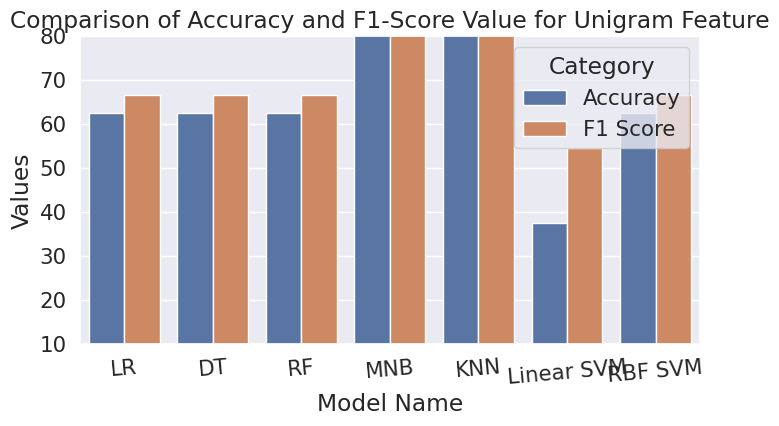

/tmp/ipython-input-3519773065.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=5)


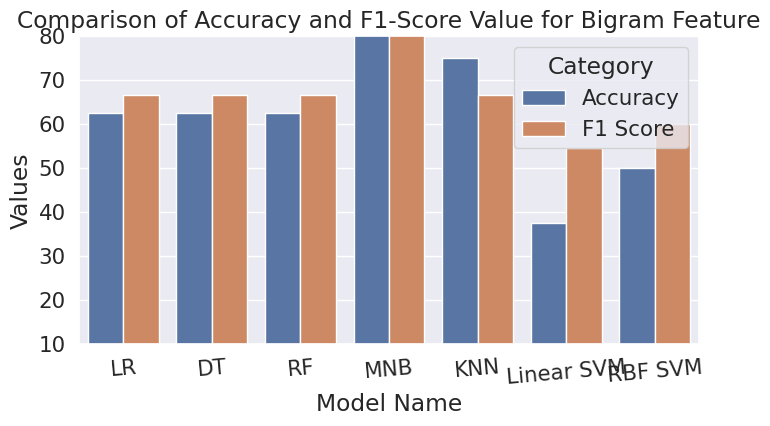

/tmp/ipython-input-3519773065.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=5)


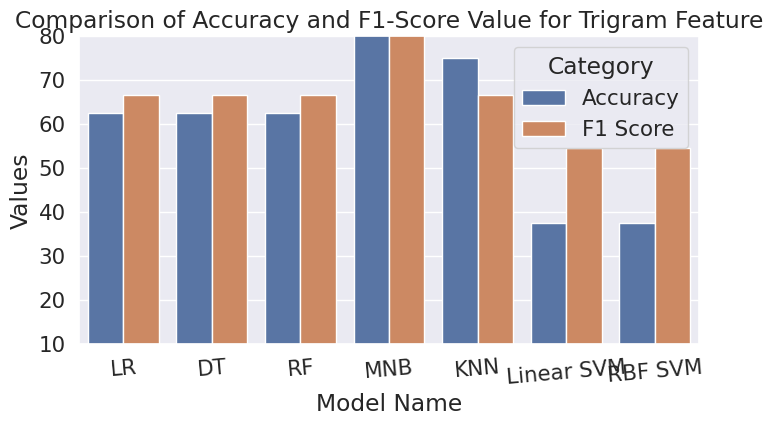

In [21]:
gram_names = ['Unigram', 'Bigram', 'Trigram']

for gram in gram_names:
    try:

        accuracy = json.load(open(path + f'ml_performance_{gram}.json'))

        table = performance_table(accuracy)

        df = pd.melt(
            table[['Accuracy', 'F1 Score', 'Model Name']],
            id_vars="Model Name",
            var_name="Category",
            value_name="Values"
        )
        plt.figure(figsize=(8, 4))
        ax = plt.subplot()
        sns.barplot(data=df, x='Model Name', y='Values', hue='Category')
        ax.set_xlabel('Model Name')
        ax.set_title(f'Comparison of Accuracy and F1-Score Value for {gram} Feature')
        ax.set_ylim([10, 80])
        ax.xaxis.set_ticklabels(table['Model Name'], rotation=5)
        plt.show()

    except FileNotFoundError:
        print(f"File for {gram} not found. Please check the file path or upload the file.")
    except Exception as e:
        print(f"An error occurred while processing {gram}: {e}")
